# Unit 5 - Financial Planning

In [115]:
# Initial imports
import os
import requests
import json
import pandas as pd
from datetime import datetime
from datetime import timedelta
import yfinance as yf
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [116]:
## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [117]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [118]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [119]:
# Get Requests for BTC and ETH 
request_btc_data = requests.get(btc_url)
request_eth_data = requests.get(eth_url)

In [120]:
# Format data into JSON
btc_data = request_btc_data.json()
eth_data = request_eth_data.json()


In [121]:
# Fetch current BTC price
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crypto assets
my_btc_value = btc_price * my_btc 
my_eth_value = eth_price * my_eth 

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27176.71
The current value of your 5.3 ETH is $8725.81


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [122]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [123]:
# Downloading 1 year data from Yahoo Finance
agg_df = yf.download("AGG", period = "1y")
spy_df = yf.download("SPY", period = "1y")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [124]:
# Presentation of Data: AGG Dataframe
agg_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,113.220001,113.300003,113.080002,113.290001,110.738274,7772100
2022-01-05,113.339996,113.360001,112.900002,112.940002,110.396164,8530900
2022-01-06,112.750000,112.839996,112.660004,112.820000,110.278862,8866500
2022-01-07,112.690002,112.709999,112.339996,112.489998,109.956299,9018900
2022-01-10,112.230003,112.419998,112.139999,112.389999,109.858551,8074900


In [125]:
# Presentation of Data: SPY Dataframe
spy_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,479.220001,479.980011,475.579987,477.549988,469.926239,71178700
2022-01-05,477.160004,477.980011,468.279999,468.380005,460.902649,104538900
2022-01-06,467.890015,470.820007,465.429993,467.940002,460.469635,86858900
2022-01-07,467.950012,469.200012,464.649994,466.089996,458.649200,85111600
2022-01-10,462.700012,465.739990,456.600006,465.510010,458.078430,119362000


In [126]:
# Reorganizing the DataFrames

# Dropping the column of Adj Close from the DataFrame:
agg_df = agg_df.drop(columns = "Adj Close").copy()
spy_df = spy_df.drop(columns = "Adj Close").copy()


In [127]:
# Concatenating the ticker DataFrames
combined_df = pd.concat([agg_df, spy_df], axis = 1, keys = ["AGG", "SPY"])

# Preview of DataFrame
combined_df.head()

AGG                                               \
                  Open        High         Low       Close   Volume   
Date                                                                  
2022-01-04  113.220001  113.300003  113.080002  113.290001  7772100   
2022-01-05  113.339996  113.360001  112.900002  112.940002  8530900   
2022-01-06  112.750000  112.839996  112.660004  112.820000  8866500   
2022-01-07  112.690002  112.709999  112.339996  112.489998  9018900   
2022-01-10  112.230003  112.419998  112.139999  112.389999  8074900   

                   SPY                                                 
                  Open        High         Low       Close     Volume  
Date                                                                   
2022-01-04  479.220001  479.980011  475.579987  477.549988   71178700  
2022-01-05  477.160004  477.980011  468.279999  468.380005  104538900  
2022-01-06  467.890015  470.820007  465.429993  467.940002   86858900  
2022-01-07  467.950012  469.200012  464.649994  466.089996   85111600  
2022-01-10  462.700012  465.739990  456.600006  465.510010  119362000

In [128]:
# Creating an empty dataframe for closing prices of AGG & SPY:
closingprices_df = pd.DataFrame()

In [129]:
# Closing Prices of AGG and SPY:
closingprices_df["AGG"] = combined_df["AGG"]["Close"]
closingprices_df["SPY"] = combined_df["SPY"]["Close"]

In [130]:
# Presentation of Data:
closingprices_df.head()

,AGG,SPY
Date,,
2022-01-04,113.290001,477.549988
2022-01-05,112.940002,468.380005
2022-01-06,112.820000,467.940002
2022-01-07,112.489998,466.089996
2022-01-10,112.389999,465.510010


In [131]:
# Pick AGG and SPY close prices
agg_close_price = closingprices_df["AGG"][-1]
spy_close_price = closingprices_df["SPY"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.55999755859375
Current SPY closing price: $380.82000732421875


In [132]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19041.00
The current value of your 200 AGG shares is $19512.00


### Savings Health Analysis

In [133]:
# Set monthly household income
monthly_income = 12000


# Consolidate financial assets data
crypto_savings = my_btc_value + my_eth_value
shares_savings = my_agg_value + my_spy_value

# Create savings DataFrame
# Setting investment types:
inv_type = ["crypto", "shares"]

# Setting the current amount of investment:
inv_savings = {
    "amount" : [crypto_savings, shares_savings]
}

df_savings = pd.DataFrame(inv_savings, index=inv_type)

# Display savings DataFrame
display(df_savings)

,amount
crypto,35902.518152
shares,38552.999878


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

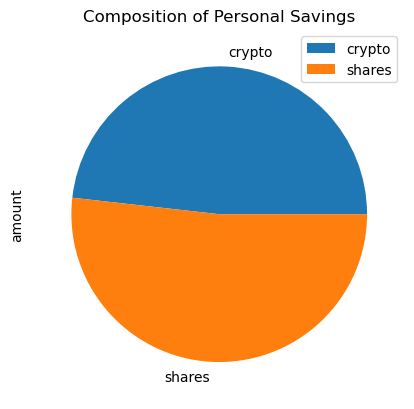

In [134]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [135]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_savings + shares_savings

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! Your Emergency Fund is sufficient")
elif total_savings == emergency_fund :
    print(f"Congratulations! You have reached the limit of your Emergency Fund but it is sufficient")
elif total_savings < emergency_fund :
    diff = emergency_fund - total_savings
    print(f"Please note that the balance of your emergency funds is below sufficient level")

Congratulations! Your Emergency Fund is sufficient


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [136]:
# Downlaoding 5 years of data for AGG and SPY from Yahoo Finance:
spy5y_df = yf.download("SPY", period = "5y")
agg5y_df = yf.download("AGG", period = "5y")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [137]:
# Presentation of Data: AGG
agg5y_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-04,109.019997,109.150002,108.970001,109.110001,96.858528,2945400
2018-01-05,109.150002,109.150002,108.949997,109.040001,96.796364,4322900
2018-01-08,109.110001,109.110001,108.949997,109.010002,96.769775,3394500
2018-01-09,108.910004,108.910004,108.690002,108.709999,96.503464,2301300
2018-01-10,108.480003,108.720001,108.430000,108.709999,96.503464,4194300


In [138]:
# Presentation of Data: SPY
spy5y_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-04,271.200012,272.160004,270.540009,271.609985,249.374115,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,251.036026,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,251.495056,57319200
2018-01-09,274.399994,275.250000,274.079987,274.540009,252.064255,57254000
2018-01-10,273.679993,274.420013,272.920013,274.119995,251.678665,69574300


In [139]:
# Reorganize the DataFrame
# Drop Adj CLose column from both dataframes
agg5y_df = agg5y_df.drop(columns="Adj Close").copy()
spy5y_df = spy5y_df.drop(columns="Adj Close").copy()

# Rename the column headers of the dataframes to all small letter
agg5y_df.rename(columns = {'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)
spy5y_df.rename(columns = {'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace = True)

# Concatenate the ticker DataFrames
combined_5y_df = pd.concat([agg5y_df, spy5y_df], axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
combined_5y_df.head()

AGG                                               \
                  open        high         low       close   volume   
Date                                                                  
2018-01-04  109.019997  109.150002  108.970001  109.110001  2945400   
2018-01-05  109.150002  109.150002  108.949997  109.040001  4322900   
2018-01-08  109.110001  109.110001  108.949997  109.010002  3394500   
2018-01-09  108.910004  108.910004  108.690002  108.709999  2301300   
2018-01-10  108.480003  108.720001  108.430000  108.709999  4194300   

                   SPY                                                
                  open        high         low       close    volume  
Date                                                                  
2018-01-04  271.200012  272.160004  270.540009  271.609985  80636400  
2018-01-05  272.510010  273.559998  271.950012  273.420013  83524000  
2018-01-08  273.309998  274.100006  272.980011  273.920013  57319200  
2018-01-09  274.399994  275.250000  274.079987  274.540009  57254000  
2018-01-10  273.679993  274.420013  272.920013  274.119995  69574300

In [140]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = combined_5y_df,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [141]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                               \
                  open        high         low       close   volume   
Date                                                                  
2018-01-04  109.019997  109.150002  108.970001  109.110001  2945400   
2018-01-05  109.150002  109.150002  108.949997  109.040001  4322900   
2018-01-08  109.110001  109.110001  108.949997  109.010002  3394500   
2018-01-09  108.910004  108.910004  108.690002  108.709999  2301300   
2018-01-10  108.480003  108.720001  108.430000  108.709999  4194300   

                                SPY                                      \
           daily_return        open        high         low       close   
Date                                                                      
2018-01-04          NaN  271.200012  272.160004  270.540009  271.609985   
2018-01-05    -0.000642  272.510010  273.559998  271.950012  273.420013   
2018-01-08    -0.000275  273.309998  274.100006  272.980011  273.920013   
2018-01-09    -0.002752  274.399994  275.250000  274.079987  274.540009   
2018-01-10     0.000000  273.679993  274.420013  272.920013  274.119995   

                                   
              volume daily_return  
Date                               
2018-01-04  80636400          NaN  
2018-01-05  83524000     0.006664  
2018-01-08  57319200     0.001829  
2018-01-09  57254000     0.002263  
2018-01-10  69574300    -0.001530

In [142]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Aakshay Gautam\Desktop\Homework\555\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999865,1.006142,1.003334,0.985399,0.996652,1.000738,1.002444,0.996883,0.997695,0.990695,...,1.006367,0.985032,1.003364,0.994236,0.994736,1.004887,1.012996,1.010041,0.990792,1.004761
2,1.011186,1.004630,0.990277,0.990716,1.009978,1.006848,0.989637,0.988356,0.995973,0.987354,...,1.016104,0.990098,1.014261,0.995849,0.985078,1.001093,1.012035,1.017991,0.993483,1.020743
3,1.034665,1.002452,0.998482,0.990530,1.022220,1.013081,0.995339,0.982361,1.007967,0.986806,...,1.011946,0.979497,1.007792,0.999258,0.980017,1.005910,1.013267,0.998279,0.996773,1.006498
4,1.032293,1.006454,0.999740,0.983118,1.029530,1.008257,0.992855,0.975495,0.986163,0.987205,...,1.013078,0.983875,1.030358,0.992451,0.969915,1.031928,1.011856,1.001677,0.982406,0.998056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.771861,2.387414,1.657035,0.780303,9.296408,3.475787,3.273869,4.625638,1.475362,3.286787,...,8.770251,3.227523,3.142399,6.966976,1.970652,6.130445,4.585818,1.396996,1.378899,5.132232
7557,0.785361,2.394366,1.658616,0.780777,9.236148,3.519975,3.284554,4.583242,1.497756,3.315492,...,8.851286,3.170168,3.137150,6.963567,1.977707,6.159954,4.631816,1.379452,1.371908,5.131300
7558,0.793284,2.394341,1.667216,0.781255,9.221574,3.533556,3.277679,4.583806,1.492474,3.300954,...,8.930961,3.188459,3.130510,7.004810,1.968713,6.151412,4.608621,1.358291,1.377245,5.049615
7559,0.787699,2.405936,1.689986,0.780827,9.281031,3.492264,3.320010,4.575734,1.500017,3.290841,...,8.999063,3.203335,3.152064,7.025212,1.958870,6.101035,4.623986,1.341693,1.372992,5.014322


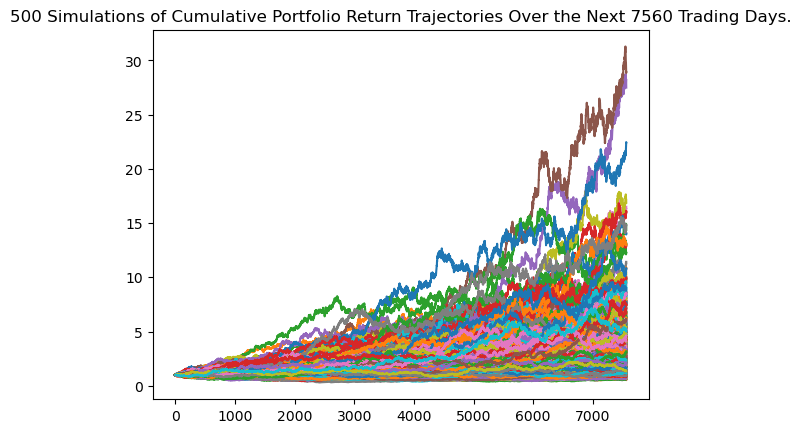

In [143]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

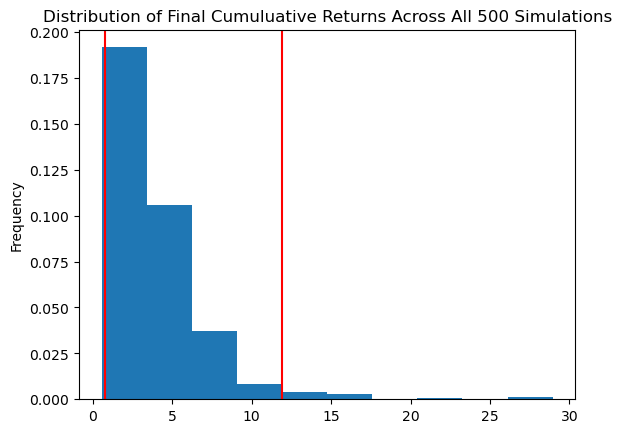

In [144]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [145]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              3.926371
std               3.213184
min               0.555173
25%               1.830940
50%               3.131762
75%               4.915130
max              28.941103
95% CI Lower      0.788499
95% CI Upper     11.885380
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [146]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $15769.97 and $237707.6


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [147]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment,2)
ci_upper = round(summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $23654.96 and $356561.41


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [148]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five = MCSimulation(
    portfolio_data = combined_5y_df,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [149]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Aakshay Gautam\Desktop\Homework\555\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990875,1.014454,1.006266,0.989720,1.015817,1.004654,0.995397,0.986599,1.005838,1.004001,...,0.996015,0.988966,0.997612,0.999127,0.983668,1.000956,0.993156,0.996467,0.994673,0.990400
2,0.995691,1.024631,1.013756,0.990123,1.001455,0.989825,1.001547,0.990180,1.001382,1.009457,...,0.996173,0.987082,1.004952,1.002424,0.986065,0.994931,0.990347,1.006003,0.997793,0.989949
3,1.009531,1.021162,1.026220,0.977077,0.997181,0.993682,1.006846,1.003990,1.014068,1.017022,...,0.992703,0.966528,1.020496,0.998672,0.986166,1.001815,0.995128,1.008907,0.990026,0.985513
4,1.020630,1.026101,1.020425,0.971585,1.001458,0.986122,1.003401,1.019437,1.010637,1.007548,...,0.999734,0.973723,1.024790,0.998433,1.001881,1.013180,0.998224,0.999528,0.978666,0.986637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.640377,1.654600,1.329276,1.186290,0.921302,1.769130,1.782578,0.726210,0.748201,1.419684,...,1.782266,1.406576,1.509692,0.779318,1.267140,0.775038,1.147666,1.805778,0.909156,1.524511
1257,2.623378,1.644913,1.304385,1.179957,0.925460,1.774518,1.779362,0.725691,0.754134,1.424563,...,1.788561,1.393700,1.539933,0.784304,1.258310,0.778942,1.136465,1.806916,0.911722,1.538099
1258,2.658327,1.655820,1.313043,1.170761,0.926740,1.785218,1.792766,0.718938,0.760215,1.407585,...,1.784675,1.402165,1.530197,0.792773,1.256729,0.770622,1.138788,1.812864,0.909169,1.532892
1259,2.646054,1.676825,1.316754,1.168028,0.921483,1.745943,1.763104,0.721575,0.773019,1.405111,...,1.812832,1.389745,1.520617,0.783479,1.248343,0.761559,1.148576,1.808715,0.883372,1.523608


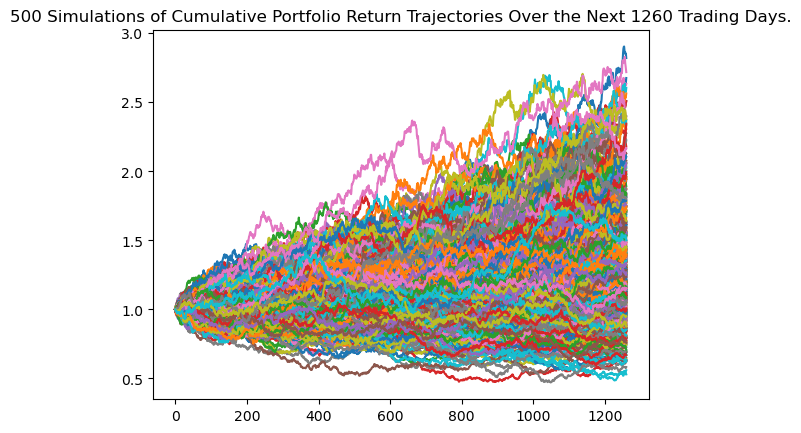

In [150]:
# Plot simulation outcomes
line_plot_five = MC_dist_five.plot_simulation()

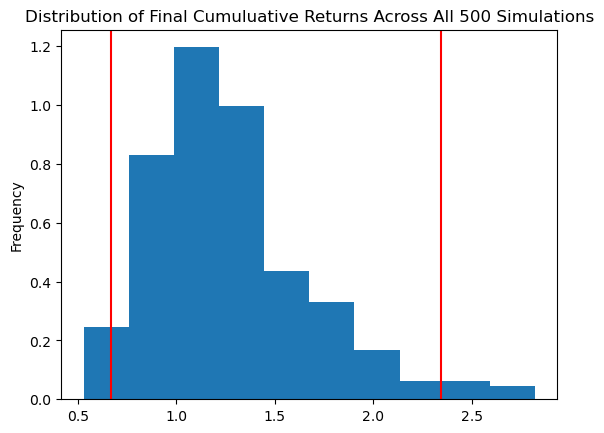

In [151]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_dist_five.plot_distribution()

In [152]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_five = MC_dist_five.summarize_cumulative_return()

# Print summary statistics
print(summary_five)

count           500.000000
mean              1.274647
std               0.401493
min               0.529865
25%               0.993444
50%               1.203371
75%               1.447662
max               2.820793
95% CI Lower      0.669550
95% CI Upper      2.341914
Name: 1260, dtype: float64


In [153]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_five[8]*initial_investment,2)
ci_upper_five = round(summary_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $33477.52 and $117095.68


### Ten Years Retirement Option

In [154]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten = MCSimulation(
    portfolio_data = combined_5y_df,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [155]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Aakshay Gautam\Desktop\Homework\555\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996421,0.997724,0.987680,0.993951,1.006269,1.003538,0.990897,0.979861,1.007119,1.003308,...,1.004318,1.012683,0.989577,0.999882,0.997855,0.993164,0.988006,0.996103,0.998431,0.996077
2,1.006154,0.993074,0.995191,0.988065,0.984473,0.999546,0.978991,0.972826,1.000068,0.994333,...,1.003548,1.015234,0.988385,1.000226,0.999488,0.995354,0.981501,0.991830,0.993222,0.985668
3,1.019097,0.995610,0.995708,0.995562,0.979310,0.993281,0.956178,0.974062,0.994448,0.999386,...,1.006697,1.028075,0.995676,0.995578,0.984871,0.982063,0.970595,1.002428,0.994419,0.989687
4,1.028008,1.014904,0.994310,0.998115,0.971222,1.003253,0.960095,0.966820,1.002677,0.996942,...,1.015952,1.031882,0.988923,0.982486,0.987862,0.982199,0.965883,1.011770,0.991476,0.984794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.747706,2.255611,1.648354,3.235424,0.945052,1.181697,1.820125,1.313778,0.783812,1.899938,...,1.278776,2.293978,1.395153,2.603132,0.660742,3.477687,0.706950,1.939449,1.221942,1.490870
2517,1.734974,2.226774,1.644584,3.292252,0.950308,1.190160,1.810165,1.320772,0.785723,1.902979,...,1.272252,2.279387,1.380252,2.586039,0.661351,3.475523,0.707803,1.917544,1.222321,1.499212
2518,1.722006,2.224737,1.646747,3.289059,0.948149,1.190225,1.810543,1.317780,0.777322,1.900683,...,1.255132,2.234874,1.389179,2.576770,0.660043,3.495134,0.698565,1.903549,1.214099,1.494039
2519,1.703593,2.226460,1.641398,3.337471,0.950971,1.181646,1.819744,1.316768,0.772425,1.916367,...,1.261396,2.220535,1.393836,2.580513,0.656447,3.515774,0.689402,1.868178,1.206411,1.502560


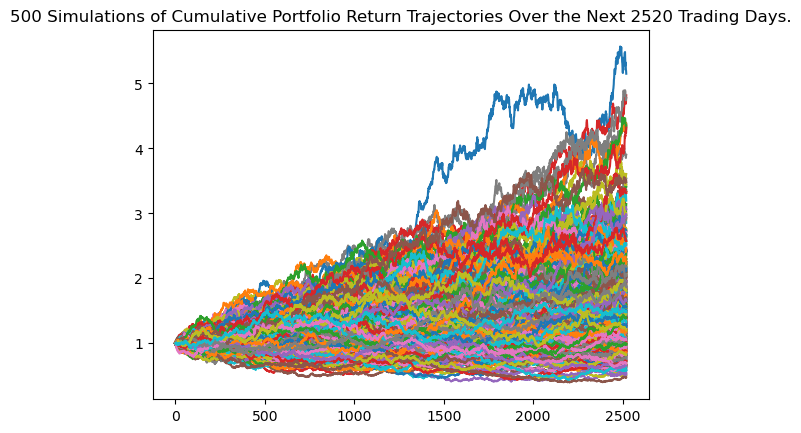

In [156]:
# Plot simulation outcomes
line_plot_ten = MC_dist_ten.plot_simulation()

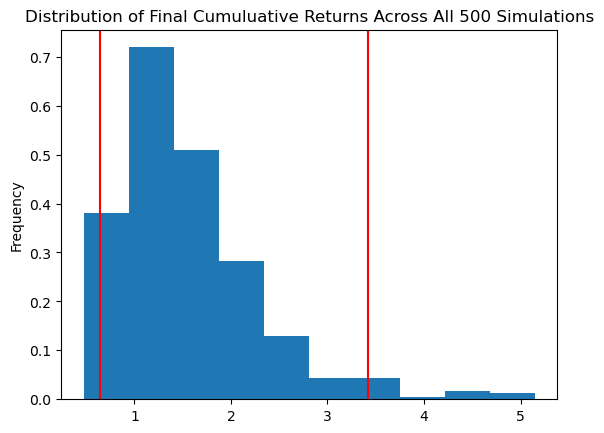

In [157]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_dist_ten.plot_distribution()

In [158]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_ten = MC_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(summary_ten)


count           500.000000
mean              1.559567
std               0.721526
min               0.476954
25%               1.052936
50%               1.400958
75%               1.872654
max               5.148731
95% CI Lower      0.644051
95% CI Upper      3.424959
Name: 2520, dtype: float64


In [159]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_ten[8]*initial_investment,2)
ci_upper_ten = round(summary_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $32202.54 and $171247.94
